In [2]:
%matplotlib inline
import numpy as np
from rnn.arch_v3 import RNN
from vae.arch_surprise_lower_tolerance import VAE
import matplotlib.pyplot as plt
from gym.utils import seeding
from IPython import display
import time
from keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

Using TensorFlow backend.



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
# action = np.array([0,1,2,3,4,5])
# action = action.astype(int)
# def convert_y(y):
#     if y == 0 or y == 2 or y == 3:
#         return 0
#     else:
#         return 1

# def convert_x(x):
#     if x <= 1:
#         return 0
#     elif x%2 == 1:
#         return -1
#     else: #x%2 == 0
#         return 1

# vx = np.vectorize(convert_x)
# vy = np.vectorize(convert_y)
# action = np.array(list(zip(vx(action), vy(action))))
# print(action)

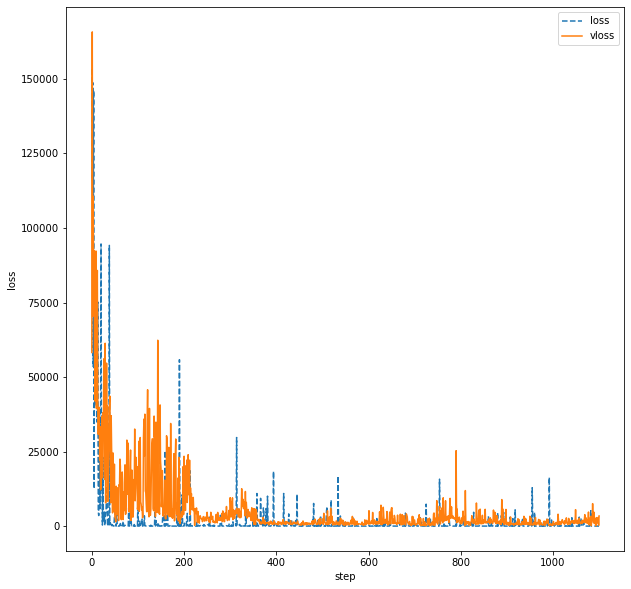

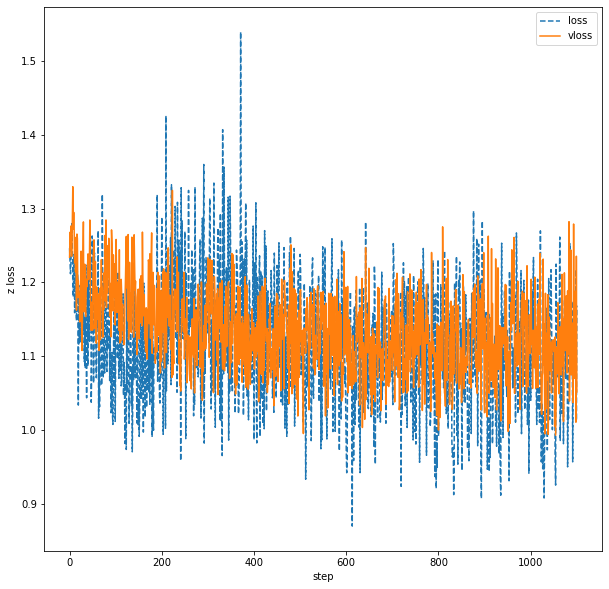

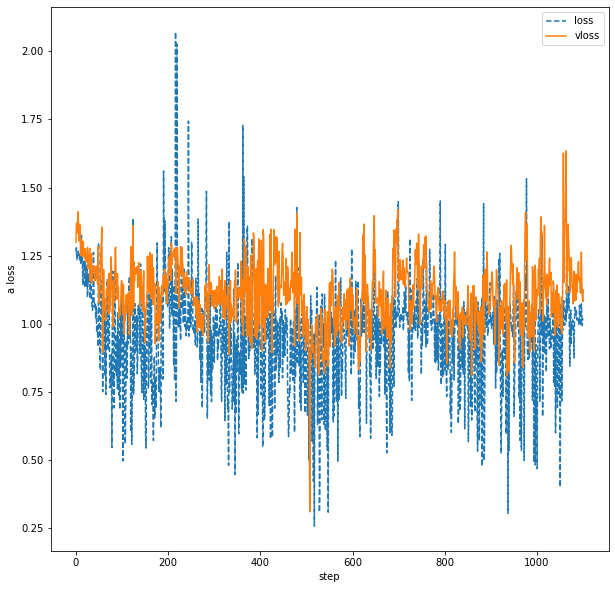

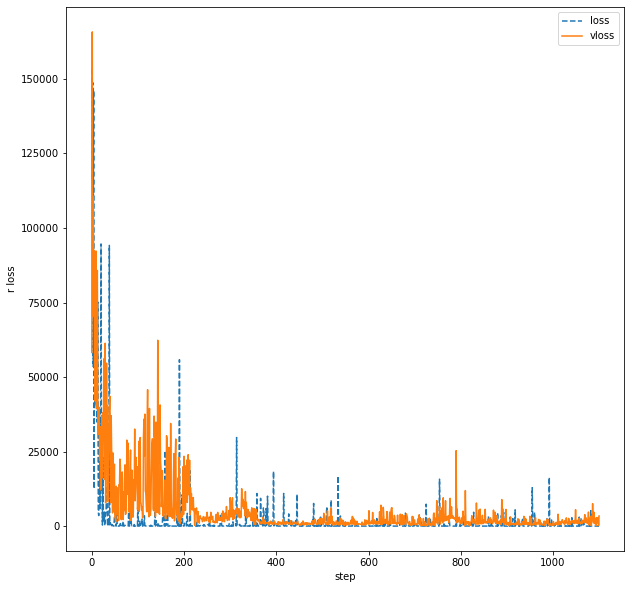

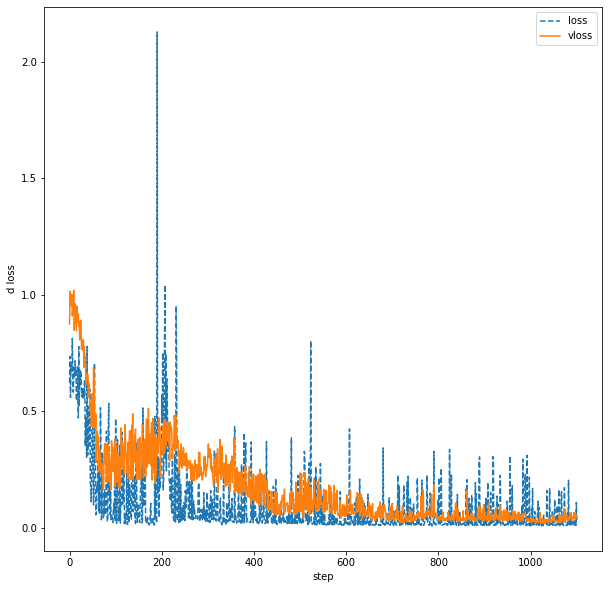

In [4]:
# read file
import json
import os
# with open('./rnn/history/hist-20190813-141643.json', 'r') as openhist:
# filename = 'hist-20190815-204528.json'
filename = 'hist-20190815-225105.json'
output = 'rnn\\renders-' + filename + '\\'
os.makedirs(output, exist_ok = True)
with open('rnn\\' + filename, 'r') as openhist:
    hist = json.load(openhist)
    
vloss = []
loss = []
aloss = []
valoss = []
rloss = []
vrloss = []
zloss = []
vzloss = []
dloss = []
vdloss = []
for a in hist:
    vloss.append(a["val_loss"])
    loss.append(a["loss"])
    aloss.append(a["rnn_action_loss"])
    valoss.append(a["val_rnn_action_loss"])
    rloss.append(a["rnn_rew_loss"])
    vrloss.append(a["val_rnn_rew_loss"])
    zloss.append(a["rnn_z_loss"])
    vzloss.append(a["val_rnn_z_loss"])
    dloss.append(a["rnn_done_loss"])
    vdloss.append(a["val_rnn_done_loss"])
    

plt.figure(0, figsize=(10,10))
plt.plot(loss, '--', label="loss")
plt.plot(vloss, '-', label="vloss")
plt.legend(loc='upper right')
plt.xlabel('step')
plt.ylabel('loss')
plt.savefig(output + 'loss.png', dpi = 400)

plt.figure(1, figsize=(10,10))
plt.plot(zloss, '--',label="loss")
plt.plot(vzloss, '-', label="vloss")
plt.legend(loc='upper right')
plt.xlabel('step')
plt.ylabel('z loss')
plt.savefig(output+ 'zloss.png', dpi = 400)

plt.figure(2, figsize=(10,10))
plt.plot(aloss, '--',label="loss")
plt.plot(valoss, '-', label="vloss")
plt.legend(loc='upper right')
plt.xlabel('step')
plt.ylabel('a loss')
plt.savefig(output + 'aloss.png', dpi = 400)


plt.figure(3, figsize=(10,10))
plt.plot(rloss, '--',label="loss")
plt.plot(vrloss, '-', label="vloss")
plt.legend(loc='upper right')
plt.xlabel('step')
plt.ylabel('r loss')
plt.savefig(output + 'rloss.png', dpi = 400)

plt.figure(4, figsize=(10,10))
plt.plot(dloss, '--',label="loss")
plt.plot(vdloss, '-', label="vloss")
plt.legend(loc='upper right')
plt.xlabel('step')
plt.ylabel('d loss')
plt.savefig(output+'dloss.png', dpi = 400)



plt.show()

In [3]:
rnn = RNN()
rnn.set_weights('./rnn/weights/weights_arch_2_b1_s4k.h5')
rnn.build_decoder('./rnn/weights/weights_arch_2_b1_s4k.h5')

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, None, 67)          0         
_________________________________________________________________
lstm (LSTM)                  [(None, None, 256), (None 331776    
_________________________________________________________________
mdn_outputs (MDN)            (None, 685)               176045    
Total params: 507,821
Trainable params: 507,821
Non-trainable params: 0
_________________________________________________________________
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, None, 67)     0                                            
_______________________________

In [12]:
X = [[-0.2458482951316448, 1.3809433225834988, -0.4939764355971144, -0.7670886103570794, 0.2658735279280934, 0.008177900680080934, 0.8242000564388178, 1.7597655224822066, 1.3407685225274542, 0.11086819691717233, 0.3478836943190793, 1.1962841279675227, -0.04699430234412563, -0.5244118472720898, -0.946282687356458, -1.143524086832629, -1.6064501387361303, -0.42407004865717773, 0.029683449916464866, 0.9287019903251817, -0.09123852304243699, -0.08309225251568438, 1.3232540794542398, -1.1054717305312924, -0.9291228075025314, 0.21730132240142971, -0.14380215208093383, 0.8568518707754458, 0.6557821105662527, -0.5024407924907257, -0.13431218365825642, 0.9487617781678686, 0.031637798076021253, 1.4404276905777593, -1.1122496492587812, -0.08283728696365183, -0.9218528004315346, 0.30957564473694305, -1.0859025213987772, 1.0468739449268005, -1.7753982575756404, -0.046259321518996865, 0.1486869842757, -0.587877139305698, 0.6313641516933917, 0.860366082900904, 0.08540210743736433, 1.0732413436711103, -0.08692252314976048, 0.7651334992869724, 0.36378691576606387, -1.030294244913371, -1.0869397944907293, -0.8681413310185032, 1.2705062278339467, -0.28201659416634356, 1.860363046590951, -0.5981623304319875, -0.6328187001454677, -0.9585032645254018, -0.031867735253164435, 0.08078572581218729, 1.2695195528814753, -0.510216700361968, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [-0.25317481567370537, 1.3457964105228262, -0.45923145442026553, -0.7567657387915112, 0.2575625253875795, 0.06762774448088471, 0.8428069577779417, 1.7284904503445289, 1.3056811605083276, 0.1149310043739978, 0.3479006886033034, 1.1406318308008538, -0.0771346281490902, -0.48486645547999724, -0.9379855983521157, -1.1465084509582832, -1.618174518315334, -0.3867095874079495, 0.04641324272952139, 0.9028260337813954, -0.14013993623550364, -0.11164340038809765, 1.3769408996750592, -1.048833173336581, -0.8910955653576305, 0.24891284944562092, -0.1908287762933528, 0.8120022517095661, 0.6216052340873308, -0.46000212471864066, -0.18615363052995076, 0.9730974482450752, -0.0007709267238694211, 1.5029100474542147, -1.149475991671755, -0.0187480947490932, -0.9668039245083113, 0.29931062586201834, -1.1015003952308413, 1.022481786370436, -1.7841749912502325, -0.10902392781693636, 0.16235126537576744, -0.5805777153992997, 0.682628721250172, 0.8515305589936966, 0.07765999459408934, 1.0878541630856555, -0.12964137250516186, 0.7168076854053417, 0.39084488737815076, -1.048822046182786, -1.080024854511101, -0.8476235748701426, 1.2744197644134139, -0.35279279243908845, 1.8564395051882634, -0.6240210983938745, -0.6240331383427985, -0.9730760565595872, -0.02623806740733378, 0.03012684455124007, 1.2714686780890314, -0.5224631041765716, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [-0.4953711819981444, 1.6133821356885762, -0.8979849616402821, -0.7143125041056242, 0.28931802823857067, 0.49929843338597285, 0.9189609316403788, 1.4492253762105347, 1.5204278066800985, 0.03717169121213959, 0.7114110979436908, 0.8637782632100965, -0.37941983079322555, 0.05118522737616197, -0.1483271364951815, -1.1200695268576777, -1.3447473020026592, -0.2934455638546578, 0.2042661190900811, 0.5903063596465211, 0.13611519535679859, -0.35930691707576384, 1.356465806063702, -1.1396508850319098, -0.7754292231880545, 0.17509083488877894, 0.11124701076325755, 0.09443126283307812, 0.7763731330589494, -0.3186971459767802, -0.0913902570423879, 0.9360917225443014, -0.041775771621703726, 1.4277446131848872, -1.2794048595805687, -0.4514179597564876, -0.9214105096650564, 0.1994783377116537, -0.9634066928036534, 0.7246124131005678, -1.7382849285602573, -0.13121544825456632, 0.28664456837090424, 0.02982806371371282, 0.4221320878302228, 0.7587529606537947, 0.12337725851495308, 0.9502170226919892, 0.1715063992429114, 0.6542932450553433, 0.15314616808378353, -0.6531752129173216, -0.9854024817808638, -0.6548246778429405, 0.7802697486036202, -0.3613175721485952, 1.8525379908805302, -1.0947375323112125, -0.6240151080636727, -1.2763867557076478, -0.18437837020018094, -0.025432440126418168, 1.0068330181141396, -0.35230316799287886, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [-0.8442324894852279, 1.9941351593497443, -1.4218473395854092, -0.9057026193566625, 0.6083985153565197, 1.1347807541715826, 0.5624839390684571, 1.1376942711096123, 1.6835976169543954, -0.06329903330133814, 0.4646018819721497, 0.4399504251766234, -0.8438992679618811, 0.8515791468277215, 0.021909055232149803, -1.428726753741089, -0.6713747144387208, -0.2521762585865798, 0.8276312144694687, 0.6591761456969935, -0.18443873758532733, 0.1381588440378535, 1.7939270036980008, -1.1650684817234798, -0.6587216519339528, 0.3835592813785101, 0.2176948308064537, -0.037969925091661326, 0.6943100327507497, 0.21836838785940207, -0.061351896263651874, 0.8221678706893756, 0.0036307352892615006, 0.9970669428120347, -1.3983911763508352, -0.48095068799866725, -0.5766738501798376, -0.17675802628575116, -0.9550131564084507, 0.6230597696102805, -1.8515280681648114, 0.22049100339372316, 0.8071293131622751, 0.07078073336642536, -0.16697914630871497, 0.18639986745315373, 0.1793753090219637, 0.3904170542895476, -0.054601921888459595, 0.5727570933937776, 0.27900362168278153, -0.4196855396614349, -0.7216277730588319, -1.3769282810713879, 0.8661988404134503, 0.31790288622275, 1.2431716371076265, -1.256842535791111, -0.8012675911881079, -1.5723121846514514, 0.28017416330643713, -0.8799078283170051, 1.1835926910910024, -0.7109529507687786, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [-0.925272817540078, 1.8925653894392993, -1.7333388291549416, -0.7339079022078572, 0.6352586070968131, 1.2519703751601, 0.7309562293093519, 0.8613049812550939, 1.7411992088999102, -0.074579716485218, 0.6210868291970457, 0.41698947203745323, -1.115436200783329, 0.9175129468313044, 0.21215415839446872, -1.247062170995637, -0.49854149067657927, -0.03965400249341693, 0.9369593136843284, 0.4726555219520241, -0.17140094211036683, 0.04739354034812446, 1.5429955471116925, -1.623073728781751, -0.8051861513519423, 0.5874036572626232, 0.12649313877862262, -0.47220495844076793, 0.7729357207273178, 0.6548906121622986, -0.18513003066116424, 0.45219665296111794, -0.027965158537042203, 0.9077161832810952, -1.1903460706486042, -0.4797258922052881, -0.6738322915870241, -0.152234310521619, -1.165038844746691, 0.22913010914442725, -1.7050694725419024, 0.45117115188818036, 1.1308599254146887, 0.29639259834083975, -0.6674705333634671, 0.29883670921690025, 0.31333005541403397, -0.03652633073303295, 0.16320929660577058, 0.35351241593139937, 0.17091064588599117, 0.23314545259541683, -0.6603242382083164, -1.587809450344161, 0.5019517213468231, 0.4816898128295862, 1.1152222798217724, -1.6582128721373, -0.7387732805005194, -1.5488443094448945, 0.5766524993471619, -0.9335427715201202, 1.0048918685843975, -0.4968192708853442, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [-0.9301467837455921, 1.4834036857239314, -1.886710104311939, -0.6806388468900844, 0.7329315363405857, 1.1259913233405925, 0.5160906618779264, 0.7411984060307835, 1.6933364004236295, -0.09466049402811412, 0.6777135547031278, 0.6494071313088714, -1.1053141311099948, 1.0488537811258976, 0.3374010679885597, -1.1728212145745571, -0.3105641780163521, 0.07048832164629774, 1.0039471840504508, 0.4045435599194808, 0.0302007580697093, -0.054358036602646896, 1.3008284718483842, -2.0703239508010856, -0.9306721241431729, 0.39549881592945013, -0.03970638213732099, -0.7313750119592337, 0.6260121698799801, 0.9283334733229802, -0.29272996889754793, 0.021903802436927553, -0.18065407826805296, 0.8364290477463098, -1.0644300269222533, -0.50050222407147, -0.6528401342184121, -0.22705915004610822, -1.4316323391199248, 0.014932081495971639, -1.4453267691267753, 0.6709080558405951, 1.2636696658684115, 0.605451625081945, -0.8906368035452471, 0.5044197575926895, 0.4760730491514115, -0.3977123980567447, 0.35399435201898766, 0.1690749895725346, 0.27243165897777394, 0.6855546463725541, -0.4799860169618828, -1.6582571368317862, 0.16734699524669502, 0.6479539203015442, 0.9018648055622496, -1.8212817495848306, -0.5961877786235148, -1.3037070756274216, 0.6708799274148471, -0.8803850684363854, 0.8325203331484489, -0.38817161188135374, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [-1.323253295247454, 0.660653245287091, -1.5732509486854622, -0.14716480250043087, 0.5317368615181961, 0.5214931073088493, 0.2560996370075691, 0.34716661464686516, 1.5762067017601642, -0.23278822589531245, 1.073228539197003, 0.6650357515013786, -0.606640465642228, 0.8520524776921077, 0.017041450871148653, -1.134773665161369, -0.23973918544772818, 0.05044570555818016, 0.9629629996038492, 0.4321311384027756, 0.38525733204693274, -0.010138760681376304, 1.624002896905832, -2.5019541513813466, -1.3886939984236517, 0.28320573813393285, -0.2719724274674039, -0.5825218830331532, 0.4753403261168331, 1.2070522545594065, -0.6132814733305105, -0.538023380285287, -0.2283899006469274, 0.7294768871809959, -1.2880701114576676, -0.4660600425584249, -0.8090861611031049, -0.033814111866129655, -2.2187524471645985, 0.06390186678618455, -1.0752074515560859, 1.0322586882680767, 1.576175300177592, 0.5053904374760493, -1.066406995719771, 1.0615377730185553, 0.47019661519153255, -0.5409981930282493, 0.33520257866138997, 0.1621105532514542, 0.8906044116783124, 1.1396302827670202, -0.24487705164374096, -1.626953854986385, -0.03835828605983435, 1.213865927051067, 0.6269433669599244, -1.6933585861078597, -0.508299774274045, -1.2128642142283277, 0.8315152784451629, -0.4079807874534502, 0.6953160385827833, -0.4538486605941527, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-1.2558721011544929, 0.38281655819650495, -1.5566490937086503, -0.2391403372156656, 0.3784261017738371, 0.4235952179352477, 0.31666652919605437, 0.23962640294460139, 1.5957033928580617, -0.11121349084689629, 1.2793006024698759, 0.6865283937000035, -0.5527783463626899, 0.6865191047382361, -0.1296350850696183, -1.0986277481969573, -0.5131719630528534, 0.04821852449362832, 0.8101025251695296, 0.3571792647902872, 0.5063456763415051, 0.0009481146429085579, 1.5927912740268757, -2.7480390557356644, -1.5624956943978259, 0.2749164203712694, -0.278558457253747, -0.5297953172522042, 0.5864258096851225, 1.070335311587033, -0.538568846888677, -0.7266002525125126, -0.40331948285225067, 0.8334920838680401, -1.2060316465821395, -0.48900355013135294, -0.9638653694399848, 0.02301531949789071, -2.425765532953611, 0.1241466681025437, -1.0634704424615624, 0.9482657224684438, 1.4999996672385982, 0.49145539510673447, -1.069337700351073, 1.3300861415984448, 0.49635121066920684, -0.7231312560163334, 0.4050242864466414, 0.1927476036386893, 0.9633840297501955, 1.178697288510687, -0.11287123365023789, -1.5625016805408452, 0.007248330957461144, 1.1699322271304098, 0.6010715685866868, -1.676758773960182, -0.5327143241070113, -1.1797028318315996, 0.9726573611234421, -0.20984427609821535, 0.6333055814684535, -0.30371364857530114, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
print(X[0][:-1])
print("reshaped:")
newX = np.array(X[0][:-1]).reshape(1,1,71)
print(newX)
rnn.sample_decoder(newX, 1, 1)
print(X[1])

[-0.2458482951316448, 1.3809433225834988, -0.4939764355971144, -0.7670886103570794, 0.2658735279280934, 0.008177900680080934, 0.8242000564388178, 1.7597655224822066, 1.3407685225274542, 0.11086819691717233, 0.3478836943190793, 1.1962841279675227, -0.04699430234412563, -0.5244118472720898, -0.946282687356458, -1.143524086832629, -1.6064501387361303, -0.42407004865717773, 0.029683449916464866, 0.9287019903251817, -0.09123852304243699, -0.08309225251568438, 1.3232540794542398, -1.1054717305312924, -0.9291228075025314, 0.21730132240142971, -0.14380215208093383, 0.8568518707754458, 0.6557821105662527, -0.5024407924907257, -0.13431218365825642, 0.9487617781678686, 0.031637798076021253, 1.4404276905777593, -1.1122496492587812, -0.08283728696365183, -0.9218528004315346, 0.30957564473694305, -1.0859025213987772, 1.0468739449268005, -1.7753982575756404, -0.046259321518996865, 0.1486869842757, -0.587877139305698, 0.6313641516933917, 0.860366082900904, 0.08540210743736433, 1.0732413436711103, -0.0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:
plot_model(rnn.model, to_file='./rnn/model.png', show_shapes=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [6]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [7]:
# obs_data = np.load('./data/obs_data_car_racing_' + str(batch_num) + '.npy') 
# action_data = np.load('./data/action_data_car_racing_' + str(batch_num) + '.npy')
# reward_data = np.load('./data/reward_data_car_racing_' + str(batch_num) + '.npy') 
# done_data = np.load('./data/done_data_car_racing_' + str(batch_num) + '.npy')
rnn_files = np.load('./data/rnn_files.npz') 
rnn_input = rnn_files['rnn_input']
rnn_output = rnn_files['rnn_output']

initial_mu = np.load('./data/initial_z.npz')['initial_mu']
initial_log_var = np.load('./data/initial_z.npz')['initial_log_var']

In [8]:
rollout_files = np.load('./data/rollout/999206096.npz') 
obs_file = rollout_files['obs']
action_file = rollout_files['action']
reward_file = rollout_files['reward']
done_file = rollout_files['done']

series_files = np.load('./data/series/999206096.npz') 
mu_file = series_files['mu']
log_var_file = series_files['log_var']
action_2_file = series_files['action']
reward_2_file = series_files['reward']
done_2_file = series_files['done']



In [9]:

hot_zs = np.where(np.exp(initial_log_var[0]/2) < 0.4)[0]
hot_zs

array([ 2,  4,  5,  6,  7, 10, 24, 25, 27])

In [10]:
GAUSSIAN_MIXTURES = 5
Z_DIM = 32
z_dim = 32

def get_mixture_coef(z_pred):

    log_pi, mu, log_sigma = np.split(z_pred, 3, 1)
    log_pi = log_pi - np.log(np.sum(np.exp(log_pi), axis = 1, keepdims = True))

    return log_pi, mu, log_sigma


In [11]:
def get_pi_idx(x, pdf):
  # samples from a categorial distribution
    N = pdf.size
    accumulate = 0
    for i in range(0, N):
        accumulate += pdf[i]
        if (accumulate >= x):
            return i
    random_value = np.random.randint(N)
    #print('error with sampling ensemble, returning random', random_value)
    return random_value

In [64]:
def sample_z(mu, log_sigma):
    z =  mu + (np.exp(log_sigma)) * np_random.randn(*log_sigma.shape) * 0.5
    return z

In [13]:
np_random, seed = seeding.np_random()

In [58]:
def sample_next_mdn_output(obs, h, c):
    
    d = GAUSSIAN_MIXTURES * Z_DIM
#     print(np.array([[obs]]))
#     print(np.array([h]))
#     print(np.array([c]))
    
#     print('------')
#     print(np.array([[obs]]).shape)
#     print(np.array([h]).shape)
#     print(np.array([c]).shape)
#     print('------')
    
    out = rnn.forward.predict([np.array([[obs]]),np.array([h]),np.array([c])])
    
    y_pred = out[0][0][0]
    new_h = out[1][0]
    new_c = out[2][0]
    
    z_pred = y_pred[:3*d]
    rew_pred = y_pred[-1]

    z_pred = np.reshape(z_pred, [-1, GAUSSIAN_MIXTURES * 3])

    log_pi, mu, log_sigma = get_mixture_coef(z_pred)
    
    chosen_log_pi = np.zeros(z_dim)
    chosen_mu = np.zeros(z_dim)
    chosen_log_sigma = np.zeros(z_dim)
    
    # adjust temperatures
    pi = np.copy(log_pi)
#     pi -= pi.max()
    pi = np.exp(pi)
    pi /= pi.sum(axis=1).reshape(z_dim, 1)
    
#     print(pi)

    for j in range(z_dim):
        
        idx = get_pi_idx(np_random.rand(), pi[j])
#         print(idx)
        chosen_log_pi[j] = idx
        chosen_mu[j] = mu[j,idx]
        chosen_log_sigma[j] = log_sigma[j,idx]
        
    next_z = sample_z(chosen_mu, chosen_log_sigma)

    if rew_pred > 0:
        next_reward = 1
    else:
        next_reward = 0

    return next_z, chosen_mu, chosen_log_sigma, chosen_log_pi, rew_pred, next_reward, new_h, new_c

In [15]:
run_idx = 10

idx = 0

# real = obs_data[run_idx]
obs = rnn_input[run_idx]
actual = rnn_output[run_idx] 

print(obs.shape)
print(actual.shape)


(299, 36)
(299, 33)


7.119570094490058
[[4.7821]]
[7.7535 6.2988 7.0639 7.2646 7.1174]


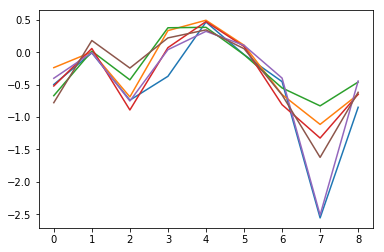

In [20]:
d = GAUSSIAN_MIXTURES * Z_DIM

print(sum(np.abs(obs[idx,hot_zs])))

plt.plot(actual[idx,hot_zs])


y_pred = rnn.model.predict(np.array([[obs[idx,:]]]))

# print(y_pred)

z_pred = y_pred[:,:,:(3*d)]
rew_pred = y_pred[:,:,-1]



print(rew_pred)

z_pred = np.reshape(z_pred, [-1, GAUSSIAN_MIXTURES * 3])

log_pi, mu, log_sigma = np.split(z_pred, 3, 1)


plt.plot(mu[hot_zs])

log_pi = log_pi - np.log(np.sum(np.exp(log_pi), axis = 1, keepdims = True))

print(sum(np.abs(mu)))


In [74]:
current_z = obs[idx]
i = idx
current_h = np.zeros(256)
current_c = np.zeros(256)

In [75]:
next_z = obs[idx,:]
next_h = np.zeros(256)
next_c = np.zeros(256)
# next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
# plt.imshow( next_z_decoded)
# plt.show()

KeyboardInterrupt: 

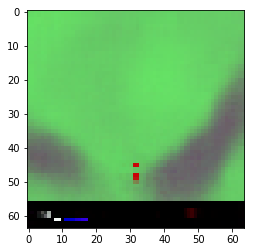

In [76]:
for i in range(300):
    next_z, chosen_mu, chosen_log_sigma, chosen_pi, rew_pred, next_reward, next_h, next_c \
    = sample_next_mdn_output(next_z, next_h, next_c)
        
    next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
    next_z = np.concatenate([next_z, [-1,1,0], [next_reward]])
    
    plt.gca().cla() 
    plt.imshow(next_z_decoded)
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    
    print(i)


In [ ]:
hot_zs

(33, 299)


/Users/davidfoster/.virtualenvs/worldmodels/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


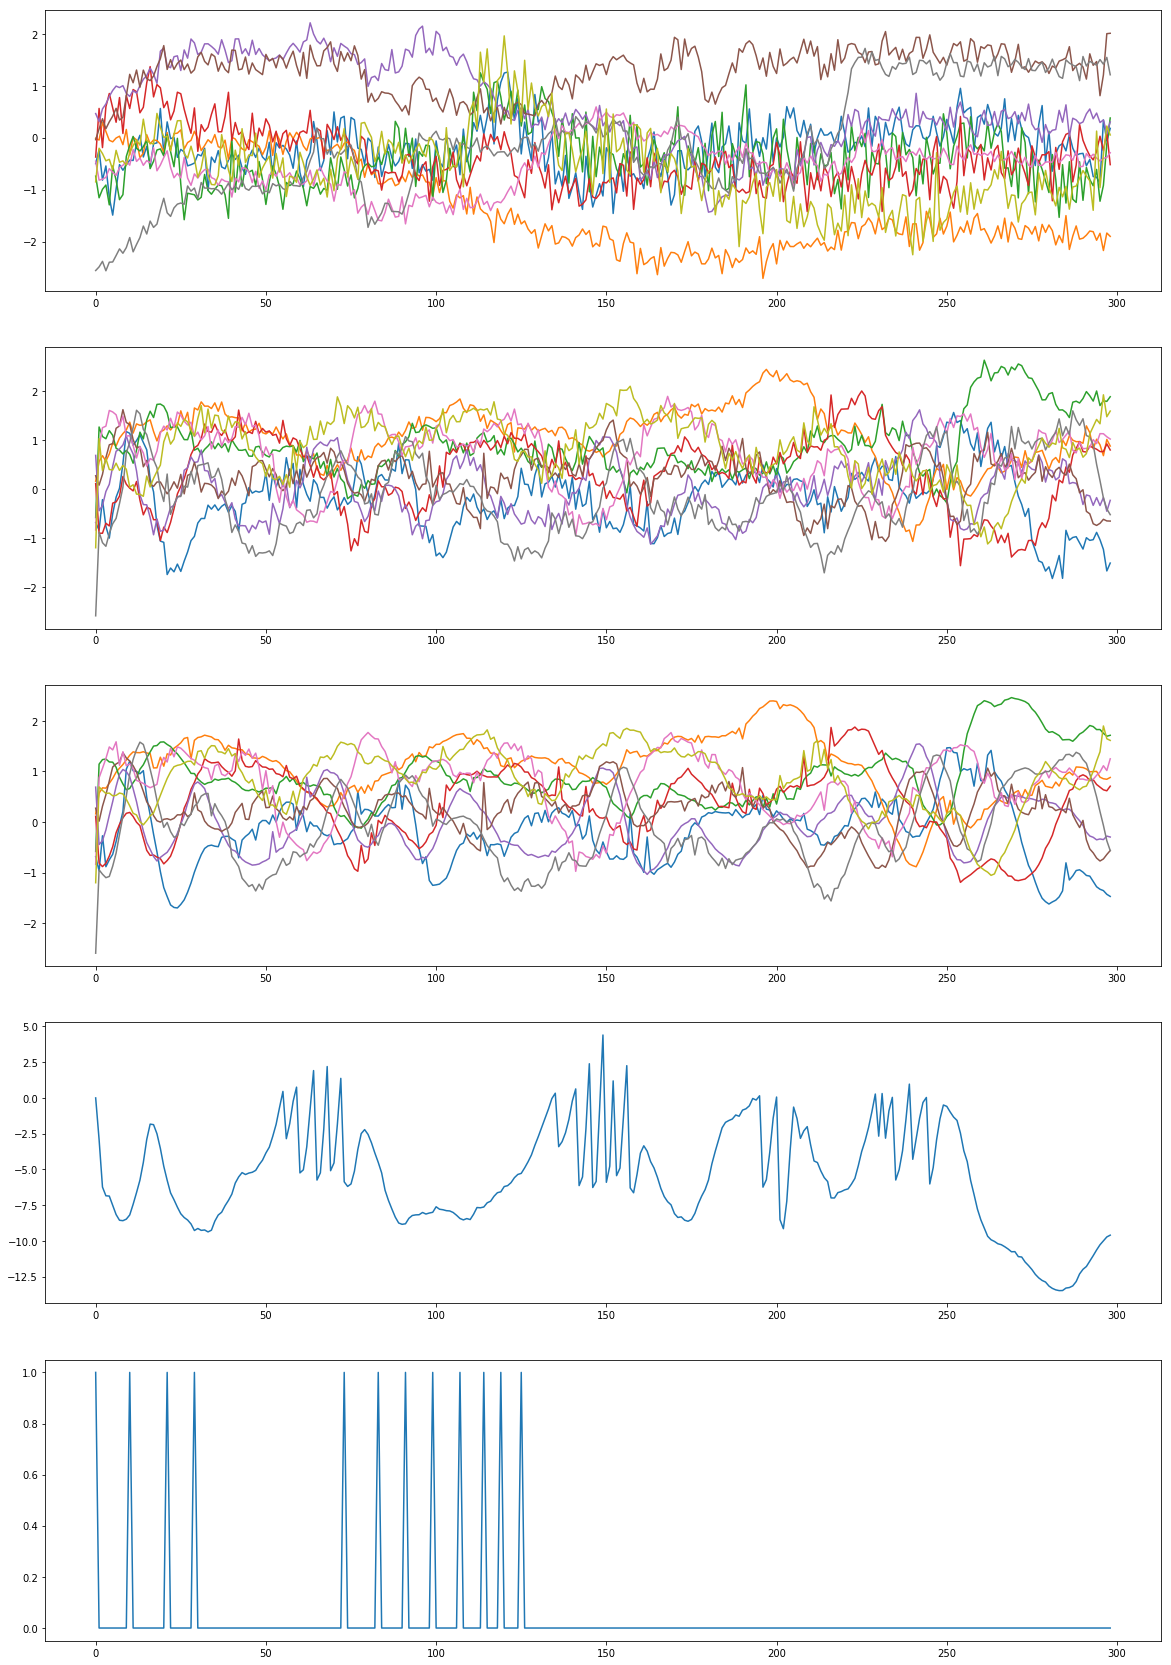

In [77]:
b = np.swapaxes(actual,0,1)
print(b.shape)
actual_rew = b[-1,:]

next_zs = np.zeros(shape = (32,299))
next_mus = np.zeros(shape = (32,299))
next_rews = np.zeros(shape = (1,299))
# next_z = np.copy(obs)
# print(next_z.shape)
next_z = obs[idx,:]

next_mus[:,0] = next_z[:32]
next_zs[:,0] = next_z[:32]
next_rews[:,0] = next_z[-1]

for i in range(1,299):
    next_z, chosen_mu, chosen_log_sigma, chosen_pi, rew_pred, next_reward, next_h, next_c = sample_next_mdn_output(next_z, next_h, next_c)
    next_mus[:,i] = chosen_mu
    next_zs[:,i] = next_z
    next_rews[:,i] = rew_pred
    
    next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
    
#     plt.gca().cla() 
#     plt.imshow( next_z_decoded)
# #     plt.show()
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 
    
    next_z = np.concatenate([next_z, [-1,1,0], [next_reward]])

plt.figure(figsize=(20,30))
for i in hot_zs:
    plt.subplot(511)
    plt.plot( b[i,:])
    plt.subplot(512)
    plt.plot( next_zs[i,:])
    plt.subplot(513)
    plt.plot( next_mus[i,:])
    
plt.subplot(514)
plt.plot(next_rews[0,:])

plt.subplot(515)
plt.plot(actual_rew[:])
    
# print(next_zs)
    